In [12]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import api_utils
import app_utils

In [13]:
# POST A LOG FILE 
# r = analysis_utils.post_log('-', '../../MBOT-RPI/data/convex_10mx10m_5cm.log')
# r

In [16]:
df = api_utils.get_table('prod')
df.head()
df.describe()

,BOT NAME,PICKLE NAME,PICKLE PATH,LOG NAME,LOG PATH,DESCRIPTION,DATE,DATETIME
count,38,38,38,38,38,38,38,38
unique,2,38,38,38,38,37,38,38
top,MICHAEL,2020_10_13_01:03:35.pkl,/home/michaellevy/data/prod/mbot/pickle/2020_1...,2020_10_15_22:58:49.log,/home/michaellevy/data/prod/mbot/log/2020_10_1...,DRIVE_TEST,2020-10-13-13:19:01,2020-10-13 00:47:02.731217-04:00
freq,29,1,1,1,1,2,1,1


In [18]:
# get df from runId
runId = 37
df = api_utils.get_df(runId)

In [19]:
df.keys()

dict_keys(['MBOT_IMU', 'MBOT_ENCODERS', 'ODOMETRY', 'MBOT_STATE', 'MBOT_SETPOINTS', 'MBOT_MOTOR_COMMAND'])

In [20]:
df_lookup = app_utils.get_lookup(df)
df_lookup

,MBOT_STATE,MBOT_IMU,MBOT_ENCODERS,ODOMETRY,MBOT_SETPOINTS,MBOT_MOTOR_COMMAND
0,timestamp,timestamp,timestamp,timestamp,timestamp,timestamp
1,utime,utime,utime,utime,utime,utime
2,fwd_velocity,gyro,leftticks,x,left_velocity,trans_v
3,turn_velocity,accel,rightticks,y,right_velocity,angular_v
4,left_velocity,mag,left_delta,theta,None,None
5,right_velocity,tb_angles,right_delta,None,None,None
6,yaw_delta,temp,None,None,None,None
7,encoder_yaw_delta,None,None,None,None,None


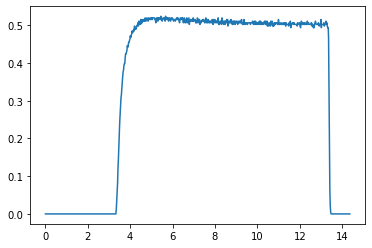

In [23]:
channel = 'MBOT_STATE'
time = app_utils.shift(df[channel]['timestamp'], time=True)

plt.plot(time, df[channel]['fwd_velocity'])

plt.show()


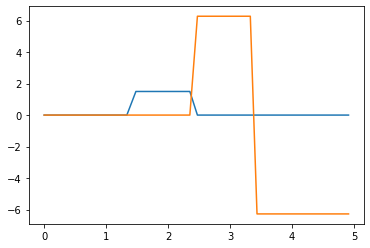

In [7]:
channel = 'MBOT_MOTOR_COMMAND'
time = app_utils.shift(df[channel]['timestamp'], time=True)

plt.plot(time, app_utils.shift(df[channel]['trans_v']))
plt.plot(time, app_utils.shift(df[channel]['angular_v']))
plt.show()